# Loan Default Prediction with Machine Learning

### 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. Loading and exploring the data

In [3]:
# Load data
loan_df = pd.read_csv('C:/Users/depet/vehicle_loans.csv', index_col = 'UNIQUEID')

In [4]:
# Preview data
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
# Examine the shape of the data
loan_df.shape

(233154, 40)

In [6]:
# Examine the data types in each column
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

In [7]:
# Examine time frame that the data contains
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

C:\Users\depet\AppData\Local\Temp\ipykernel_24068\2480775020.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])


In [8]:
# Find start and end dates
print('Maximum Disbursal Date: ', loan_df['DISBURSAL_DATE'].max())
print('Minimum Disbursal Date: ', loan_df['DISBURSAL_DATE'].min())

Maximum Disbursal Date:  2018-12-10 00:00:00
Minimum Disbursal Date:  2018-01-08 00:00:00


In [9]:
# Print the timespan
print('Timespan of Disbursal Date: ', loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())

Timespan of Disbursal Date:  336 days 00:00:00


#### LOAN_DEFAULT is the target variable. 1 means default, 0 means performing

In [10]:
# Examine LOAN_DEFAULT
loan_df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

Of the 233,154 total loans, 50611 have defaulted. 

In [12]:
# Use 'normalize' to get convert value counts to a percentage
loan_df['LOAN_DEFAULT'].value_counts(normalize = True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

#### Visualize the target variable with Seaborn

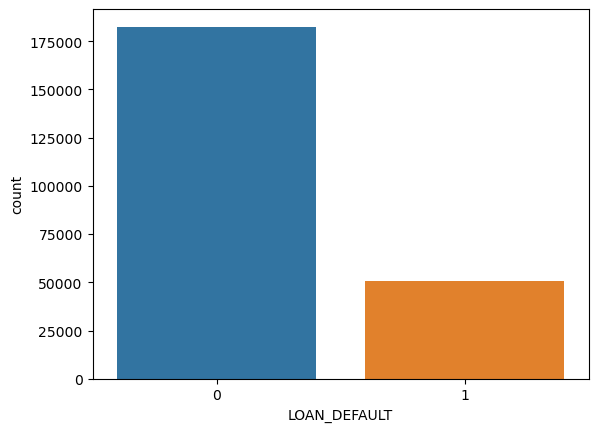

In [16]:
# Plot the loan defaults
sns.countplot(x = 'LOAN_DEFAULT', data = loan_df)
plt.show();

### 4. Managing missing values